In [2]:
# 1) scatter plot, hot map,geopandas
# 2) for binary and multiclass
# 3) overlay kind of

In [4]:
import pandas as pd
df = pd.read_csv('crime.csv',encoding='ANSI')

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"


In [6]:
a = df['OFFENSE_CODE_GROUP'].value_counts()

In [10]:
for c, name in zip(a,a.index):
    print("{:<40} {:<10}".format(name,c))

Motor Vehicle Accident Response          35342     
Larceny                                  24534     
Medical Assistance                       22351     
Investigate Person                       17867     
Other                                    17223     
Drug Violation                           15844     
Simple Assault                           15025     
Vandalism                                14741     
Verbal Disputes                          12370     
Towed                                    10656     
Investigate Property                     10562     
Larceny From Motor Vehicle               10276     
Property Lost                            9156      
Warrant Arrests                          7970      
Aggravated Assault                       7402      
Violations                               5854      
Fraud                                    5453      
Residential Burglary                     5402      
Missing Person Located                   4730      
Auto Theft  

In [11]:
df['Target'] = df['OFFENSE_CODE_GROUP'].apply(lambda x: 1 if x in serious else 0)

In [12]:
b = df.isna().sum()

In [13]:
b

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1643
REPORTING_AREA              0
SHOOTING               302402
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10618
Lat                     18839
Long                    18839
Location                    0
Target                      0
dtype: int64

In [14]:
th = len(df)*20/100

In [15]:
th

60674.2

In [16]:
col = b[b<=th].index

In [17]:
col

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location', 'Target'],
      dtype='object')

In [18]:
df = df[col]

In [19]:
list(col)

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location',
 'Target']

In [20]:
df['STREET'].value_counts()

WASHINGTON ST     13504
BLUE HILL AVE      7385
BOYLSTON ST        6873
DORCHESTER AVE     4907
TREMONT ST         4517
                  ...  
PROVIDENCE HWY        1
MISSION PK DR         1
ADAMS S               1
BARTLETT CRES         1
GREENHALGE ST         1
Name: STREET, Length: 4595, dtype: int64

In [21]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Target
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)",0
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)",0
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)",1
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)",1
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)",0


In [22]:
col_rq = ['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'Target']

In [23]:
col_rq

['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'Target']

In [24]:
df = df[col_rq]

In [25]:
df_copy = df.copy() 

In [26]:
df_copy

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,Target
0,3301,VERBAL DISPUTE,B3,428,2018,7,Tuesday,20,Part Three,42.282829,-71.091825,"(42.28282878, -71.09182490)",0
1,3114,INVESTIGATE PROPERTY,E18,481,2018,7,Tuesday,21,Part Three,42.266525,-71.098553,"(42.26652466, -71.09855320)",0
2,619,LARCENY ALL OTHERS,B2,182,2018,7,Tuesday,21,Part One,42.322496,-71.069092,"(42.32249601, -71.06909180)",1
3,617,LARCENY THEFT FROM BUILDING,E5,714,2018,7,Tuesday,18,Part One,42.262539,-71.165069,"(42.26253888, -71.16506913)",1
4,3410,TOWED MOTOR VEHICLE,C6,211,2018,7,Tuesday,20,Part Three,42.338964,-71.048964,"(42.33896439, -71.04896420)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,3125,WARRANT ARREST,D4,285,2016,6,Sunday,17,Part Three,42.336951,-71.085748,"(42.33695098, -71.08574813)",0
303367,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015,7,Thursday,13,Part One,42.255926,-71.123172,"(42.25592648, -71.12317207)",1
303368,3125,WARRANT ARREST,E18,520,2015,7,Thursday,13,Part Three,42.255926,-71.123172,"(42.25592648, -71.12317207)",0
303369,3125,WARRANT ARREST,E13,569,2016,5,Tuesday,19,Part Three,42.302333,-71.111565,"(42.30233307, -71.11156487)",0


In [27]:
df

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,Target
0,3301,VERBAL DISPUTE,B3,428,2018,7,Tuesday,20,Part Three,42.282829,-71.091825,"(42.28282878, -71.09182490)",0
1,3114,INVESTIGATE PROPERTY,E18,481,2018,7,Tuesday,21,Part Three,42.266525,-71.098553,"(42.26652466, -71.09855320)",0
2,619,LARCENY ALL OTHERS,B2,182,2018,7,Tuesday,21,Part One,42.322496,-71.069092,"(42.32249601, -71.06909180)",1
3,617,LARCENY THEFT FROM BUILDING,E5,714,2018,7,Tuesday,18,Part One,42.262539,-71.165069,"(42.26253888, -71.16506913)",1
4,3410,TOWED MOTOR VEHICLE,C6,211,2018,7,Tuesday,20,Part Three,42.338964,-71.048964,"(42.33896439, -71.04896420)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,3125,WARRANT ARREST,D4,285,2016,6,Sunday,17,Part Three,42.336951,-71.085748,"(42.33695098, -71.08574813)",0
303367,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015,7,Thursday,13,Part One,42.255926,-71.123172,"(42.25592648, -71.12317207)",1
303368,3125,WARRANT ARREST,E18,520,2015,7,Thursday,13,Part Three,42.255926,-71.123172,"(42.25592648, -71.12317207)",0
303369,3125,WARRANT ARREST,E13,569,2016,5,Tuesday,19,Part Three,42.302333,-71.111565,"(42.30233307, -71.11156487)",0


In [28]:
list(df)

['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'Target']

In [29]:
df = pd.get_dummies(df,columns=['OFFENSE_DESCRIPTION','DISTRICT','DAY_OF_WEEK','UCR_PART'])

In [30]:
df.head()

,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long,Location,Target,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,428,2018,7,20,42.282829,-71.091825,"(42.28282878, -71.09182490)",0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,481,2018,7,21,42.266525,-71.098553,"(42.26652466, -71.09855320)",0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,182,2018,7,21,42.322496,-71.069092,"(42.32249601, -71.06909180)",1,0,...,0,0,0,0,1,0,0,1,0,0
3,617,714,2018,7,18,42.262539,-71.165069,"(42.26253888, -71.16506913)",1,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,211,2018,7,20,42.338964,-71.048964,"(42.33896439, -71.04896420)",0,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
df.drop('Lat',axis=1,inplace=True)

In [32]:
df.drop('Long',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)

In [33]:
 df.drop('REPORTING_AREA',axis=1,inplace=True)

In [34]:
df.head()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Target,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,2018,7,21,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,617,2018,7,18,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
list(df.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'

In [36]:
df.select_dtypes('object').shape # object = string

(303371, 0)

In [37]:
df.head()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Target,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,2018,7,21,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,617,2018,7,18,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
X = df.drop('Target',axis=1)

In [39]:
y = df['Target']

In [40]:
X.head()

,OFFENSE_CODE,YEAR,MONTH,HOUR,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,OFFENSE_DESCRIPTION_ANIMAL ABUSE,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,617,2018,7,18,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Target, dtype: int64

# Build Model

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,shuffle=True)

In [1]:
X_test.shape

NameError: name 'X_test' is not defined

In [44]:
df

,OFFENSE_CODE,YEAR,MONTH,HOUR,Target,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,2018,7,21,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,617,2018,7,18,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,3125,2016,6,17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
303367,111,2015,7,13,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
303368,3125,2015,7,13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
303369,3125,2016,5,19,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
16624,0,0
170450,1,1
94524,0,0
186680,1,1
76020,1,1
...,...,...
298857,1,1
236472,1,1
227792,0,0
231228,0,0


In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [46]:
accuracy_score(y_test,y_pred)

0.9728913676937885

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35294
           1       0.98      0.97      0.97     40549

    accuracy                           0.97     75843
   macro avg       0.97      0.97      0.97     75843
weighted avg       0.97      0.97      0.97     75843



In [48]:
confusion_matrix(y_test,y_pred)

array([[34317,   977],
       [ 1079, 39470]], dtype=int64)

In [49]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

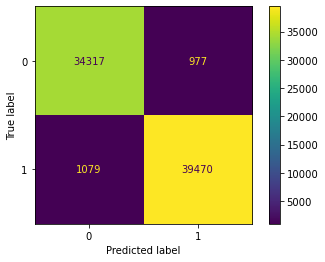

In [50]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [46]:
X_test.index

Int64Index([ 16624, 170450,  94524, 186680,  76020, 201076, 252213, 271137,
             24490, 201319,
            ...
            197930, 240979, 117748, 299371,  88237, 298857, 236472, 227792,
            231228,  54648],
           dtype='int64', length=75843)

In [51]:
df_copy.iloc[X_test.index]['Long']

16624    -71.119606
170450   -71.087478
94524    -71.148221
186680   -71.073886
76020    -71.072124
            ...    
298857   -71.077163
236472   -71.105512
227792   -71.065471
231228   -71.100879
54648    -71.055055
Name: Long, Length: 75843, dtype: float64

In [63]:
df_copy[df_copy['Target']==1][['Lat','Long']]

,Lat,Long
2,42.322496,-71.069092
3,42.262539,-71.165069
9,42.291316,-71.071703
11,42.282735,-71.054965
12,42.350096,-71.077321
...,...,...
303359,42.301897,-71.085549
303362,42.352312,-71.063705
303363,42.352312,-71.063705
303364,42.322838,-71.100967


In [55]:
a = df_copy.loc[X_test.index]['Lat']
b = df_copy.loc[X_test.index]['Long']

In [67]:
a

16624     42.312289
170450    42.346765
94524     42.287094
186680    42.283391
76020     42.332547
            ...    
298857    42.315439
236472    42.334575
227792    42.305407
231228    42.324694
54648     42.330162
Name: Lat, Length: 75843, dtype: float64

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
a

16624     42.312289
170450    42.346765
94524     42.287094
186680    42.283391
76020     42.332547
            ...    
298857    42.315439
236472    42.334575
227792    42.305407
231228    42.324694
54648     42.330162
Name: Lat, Length: 75843, dtype: float64

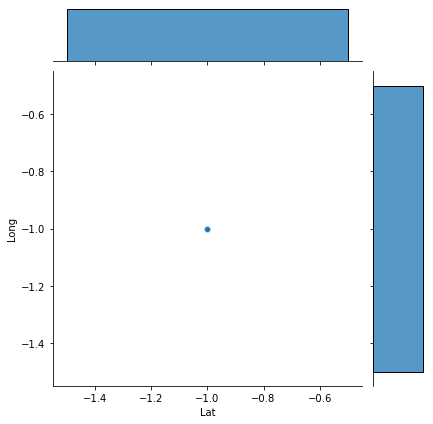

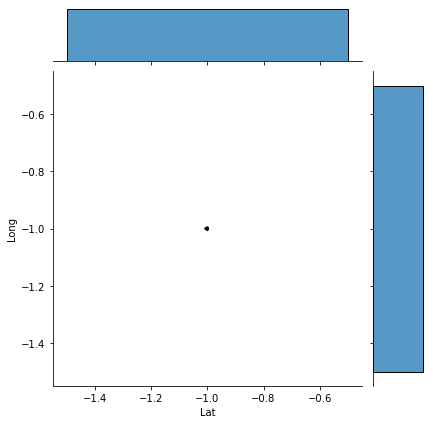

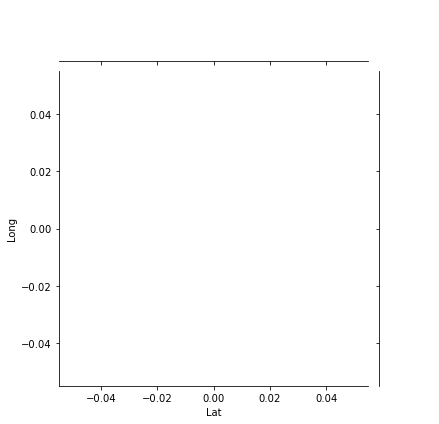

In [82]:
sns.jointplot(a[a<40],b[b>-60], kind='scatter')
sns.jointplot(a[a<40],b[b>-60], kind='hex')
sns.jointplot(a[a<40],b[b>-60], kind='kde')

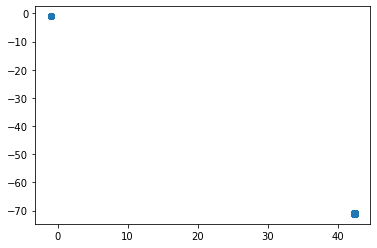

In [56]:
plt.scatter(a,b, alpha=0.5)

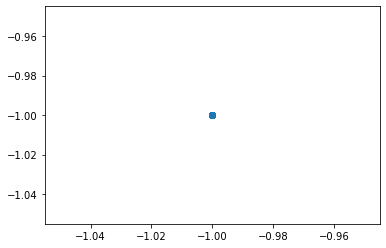

In [83]:
plt.scatter(a[a<40],b[b>-60], alpha=0.5)

In [127]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [128]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [129]:
accuracy_score(y_test,y_pred)

1.0

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35294
           1       1.00      1.00      1.00     40549

    accuracy                           1.00     75843
   macro avg       1.00      1.00      1.00     75843
weighted avg       1.00      1.00      1.00     75843



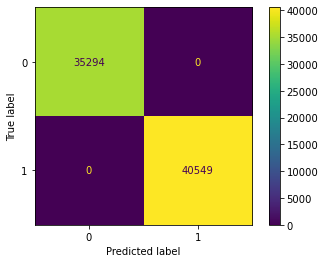

In [131]:
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [132]:
X_train.shape

(227528, 270)

In [133]:
X_test.shape

(75843, 270)

In [134]:
X_train.shape[0] + X_test.shape[0]

303371

In [135]:
X_test.shape[0]

75843

In [139]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred)

0.9999340743377767

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35294
           1       1.00      1.00      1.00     40549

    accuracy                           1.00     75843
   macro avg       1.00      1.00      1.00     75843
weighted avg       1.00      1.00      1.00     75843



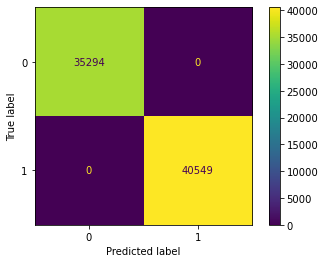

In [142]:
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [145]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [150]:
nn_class = MLPClassifier(
                        solver='lbfgs',
                        alpha=1e-5, 
                        hidden_layer_sizes=(20),
                        random_state=1,
                        max_iter=1000
                        )

nn_class.fit(X_train, y_train)
y_pred = nn_class.predict(X_test)

In [151]:
accuracy_score(y_test,y_pred)

0.5346439354983321

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35294
           1       0.53      1.00      0.70     40549

    accuracy                           0.53     75843
   macro avg       0.27      0.50      0.35     75843
weighted avg       0.29      0.53      0.37     75843



In [159]:
from sklearn.model_selection import GridSearchCV
# https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [154]:
10.0 ** -np.arange(1, 10)

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09])

In [158]:
np.arange(10, 15)

array([10, 11, 12, 13, 14])

In [ ]:
[10,11,12,13,14,15]
[(10,5,12), (10,10,14), (10,20,30)]

In [162]:
param_grid = {'solver': ['lbfgs'], 
 'max_iter': [1000,1100 ], # 1200,1300,1400,1500,1600,1700,1800,1900,2000
 'alpha': 10.0 ** -np.arange(1, 4), 
 'hidden_layer_sizes':np.arange(10, 15)
}

In [ ]:
CV_rfc = GridSearchCV(estimator=nn_class, param_grid=param_grid, cv= 5,n_jobs=-1,verbose=3)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [156]:
print(1e-5)

1e-05


In [157]:
'{:f}'.format(1e-5)

'0.000010'